## Load necessary modules

In [1]:
# show images inline
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

# import keras
import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time
import pandas as pd

# set tf backend to allow memory to grow, instead of claiming everything
import tensorflow as tf

def get_session():
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    return tf.Session(config=config)

# use this environment flag to change which GPU to use
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]='2'
# set the modified tf session as backend in keras
keras.backend.tensorflow_backend.set_session(get_session())


# hyperparamet
backbone= "resnet101"
season= "2010"

Using TensorFlow backend.


## Load RetinaNet model

In [3]:
df_tmp= pd.read_csv("./back/mydataset_classmapping.csv", header=None)
df = df_tmp.to_dict()[0]

# adjust this to point to your downloaded/trained model
# models can be downloaded here: https://github.com/fizyr/keras-retinanet/releases
#model_path = os.path.join('..', 'snapshots', 'mymodel.h5')

model_path = os.path.join('./back/mymodel.h5') #101로 할지 
#resnet50_csv_20.h5
# load retinanet model
model = models.load_model(model_path, backbone_name=backbone)

# if the model is not converted to an inference model, use the line below
# see: https://github.com/fizyr/keras-retinanet#converting-a-training-model-to-inference-model
#model = models.convert_model(model)

#print(model.summary())

# load label to names mapping for visualization purposes
labels_to_names= df

tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_1:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_2:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_3:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_4:0' shape=(9, 4) dtype=float32> anchors


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/Users/kante/opt/anaconda3/envs/test/lib/python3.6/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


### test list

In [5]:
nmf_path= "./back/media"
test_list= os.listdir(nmf_path)
len(test_list)

124

In [7]:
current_filename = 'FW2010_etro_11.jpg'

./back/media
./back/media
processing time:  6.028853893280029
-----------------------------------------
[220.81223 160.1292  545.7586  582.03534]
[214.82697 157.12012 544.9328  580.3109 ]
[ 278.11807  529.2235   527.11    1041.236  ]
[ 278.11807  529.2235   527.11    1041.236  ]
[211.01263 172.12445 547.9669  581.36066]


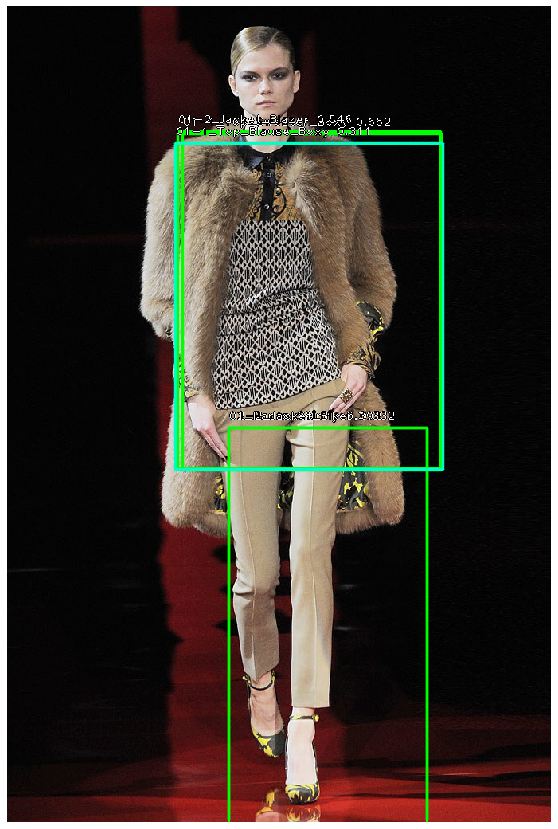

In [27]:
path = os.path.join(nmf_path)
print(nmf_path)
print(path)
# path = "/home/jin6491/temp_15/RetinaNet/keras-retinanet-master/datas_json/imgs" #grey+shpening_test
image_name = []
prediction = []
confidence = []
error = []
box_coordinates = []
image = read_image_bgr(os.path.join(path, current_filename))
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)


image = preprocess_image(image)
image, scale = resize_image(image)

start = time.time()
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))

print("processing time: ", time.time() - start)
print("-----------------------------------------")
image_name.append(current_filename)
prediction.append(labels[0])
confidence.append(scores[0])
prediction_new = []

for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can break
    if score < 0.3: 
        break

    color = label_color(label)

    b = box.astype(int)
    draw_box(draw, b, color=color)
    box_coordinates.append(b)

    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(draw, b, caption)

plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(draw)
plt.show()


prediction.append(labels[0])
confidence.append(scores[0])

In [25]:
labels[0]

array([ 80,  83,  86,  85,  76,  78,   0,  74,  84,  75, 124,  88,  11,
        82,  69,  34,  25,  69,  25,  87,  34,  17,  89,  72,  79,  34,
        34,  34,  81,  17,  69,  69,  77, 128,  83,  69,   2, 127,  78,
        34,  34,  69,  83,  86,  21,  20,  34,  83,  34,  34,  29,  69,
        87,  74,  69,  74,   5,  80,  69,  85,  34,  37,  69,   0,  65,
        30,  19,  30,  69,  94,  66,  34,  65,  22,  76,  34,  44,  24,
        -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,
        -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,
        -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,
        -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,
        -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,
        -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,
        -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,
        -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -

In [13]:
box

array([191.17056, 176.95448, 555.84686, 576.7404 ], dtype=float32)

## Run detection on example

0 1
processing time:  4.653565883636475
-----------------------------------------


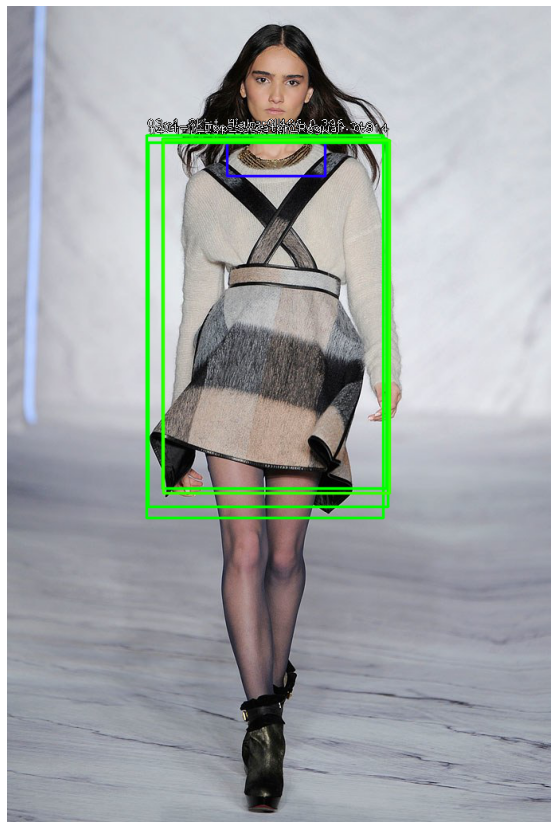

In [19]:
# load image

path= nmf_path
image_name= []
prediction= []
confidence= []
error= []

for i, num in zip(test_list,range(0,len(test_list))):
    try:
        image = read_image_bgr(os.path.join(path,i))
    except:
        error.append(i)
        continue

    # copy to draw on
    draw = image.copy()
    draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

    # preprocess image for network
    image = preprocess_image(image)
    image, scale = resize_image(image)

    # process image
    start = time.time()
    boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
    print(num, len(test_list))
    print("processing time: ", time.time() - start)
    print("-----------------------------------------")

    # correct for image scale
    boxes /= scale

    # visualize detections
    for box, score, label in zip(boxes[0], scores[0], labels[0]):
        # scores are sorted so we can break
        if score < 0.3: 
            break

        color = label_color(label)

        b = box.astype(int)
        draw_box(draw, b, color=color)

        caption = "{} {:.3f}".format(labels_to_names[label], score)
        draw_caption(draw, b, caption)

    plt.figure(figsize=(15, 15))
    plt.axis('off')
    plt.imshow(draw)
    plt.show()
    
    image_name.append(i)
    prediction.append(labels[0])
    confidence.append(scores[0])
    
    #print(i)          

In [18]:
box

array([185.07913, 164.00719, 480.31833, 630.893  ], dtype=float32)

In [7]:
prediction_new= []

for i in prediction:
    new_i= list(i)
    prediction_new.append(new_i)
    
confidence_new= []

for i in confidence:
    new_i= list(i)
    confidence_new.append(new_i)

In [8]:
df= pd.DataFrame({"image_name":image_name,"prediction":prediction_new, "confidence": confidence_new})
df.to_csv("/home/jin6491/temp_15/RetinaNet/keras-retinanet-master/examples/test_result_resnet101-e20_2010.csv", index=False)
#test_result_grey_shapening.csv